## MARC 2022 Training Workshop on Machine Learning and NLP 
## Part II: NLP

### Jiangang Hao, ETS, contact: <jhao@ets.org>
----

### 1. Load packages

In [1]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
import nltk
from spellchecker import SpellChecker
import string
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')

### 2. Text preprocessing and Ngram 

In [2]:
text = 'The class is over. I hopep it is intersting to you. Please let me knoww if not.'

In [3]:
#change to lower case
text.lower()

'the class is over. i hopep it is intersting to you. please let me knoww if not.'

In [4]:
# word tokenization
word_tokens = word_tokenize(text)
print(word_tokens)

['The', 'class', 'is', 'over', '.', 'I', 'hopep', 'it', 'is', 'intersting', 'to', 'you', '.', 'Please', 'let', 'me', 'knoww', 'if', 'not', '.']


In [5]:
# remove stop words and punctuations
stopword_list = stopwords.words('english')
punctuation_list = list(string.punctuation)
cleaned_text = [txt for txt in word_tokenize(text.lower()) if txt not in stopword_list+punctuation_list]
print(cleaned_text)

['class', 'hopep', 'intersting', 'please', 'let', 'knoww']


In [8]:
# typo correction
spell = SpellChecker()
corrected_text = [spell.correction(wd) for wd in cleaned_text]
print(corrected_text)

['class', 'hope', 'interesting', 'please', 'let', 'knoww']


In [9]:
# part of speech tagging
pos_tag(corrected_text)

[('class', 'NN'),
 ('hope', 'NN'),
 ('interesting', 'VBG'),
 ('please', 'JJ'),
 ('let', 'VB'),
 ('knoww', 'VB')]

In [10]:
# Stemming the words
porter = PorterStemmer()
stem_words = [porter.stem(txt) for txt in corrected_text]
list(zip(corrected_text,stem_words))

[('class', 'class'),
 ('hope', 'hope'),
 ('interesting', 'interest'),
 ('please', 'pleas'),
 ('let', 'let'),
 ('knoww', 'knoww')]

In [11]:
# ngram representation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [12]:
# sentence tokenization
sentence_list = sent_tokenize(text)
print(sentence_list)

['The class is over.', 'I hopep it is intersting to you.', 'Please let me knoww if not.']


In [13]:
# applying the stop words removal and typo correction
correct_sentence_list = []
for sent in sentence_list:
    correct_sentence_list.append(' '.join([spell.correction(wd) for wd in word_tokenize(sent.lower()) \
                                  if wd not in stopword_list+punctuation_list]))
   

In [14]:
correct_sentence_list

['class', 'hope interesting', 'please let knoww']

In [15]:
#unigram
vectorizer = CountVectorizer(ngram_range=(1,1)) 
X = vectorizer.fit_transform(correct_sentence_list)
df = pd.DataFrame(X.toarray())
df.columns = vectorizer.get_feature_names_out()
df

,class,hope,interesting,knoww,let,please
0,1,0,0,0,0,0
1,0,1,1,0,0,0
2,0,0,0,1,1,1


In [16]:
# Tf-Idf transformation of unigram
vectorizer = TfidfVectorizer(ngram_range=(1,1)) 
X = vectorizer.fit_transform(correct_sentence_list)
df = pd.DataFrame(X.toarray())
df.columns = vectorizer.get_feature_names_out()
df.round(2)

,class,hope,interesting,knoww,let,please
0,1.0,0.00,0.00,0.00,0.00,0.00
1,0.0,0.71,0.71,0.00,0.00,0.00
2,0.0,0.00,0.00,0.58,0.58,0.58


In [17]:
#bigram
vectorizer = CountVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform(sentence_list)
df = pd.DataFrame(X.toarray())
df.columns = vectorizer.get_feature_names_out()
df

,class is,hopep it,if not,intersting to,is intersting,is over,it is,knoww if,let me,me knoww,please let,the class,to you
0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0,1,0,1,1,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,0,1,1,1,1,0,0


### 3. Latent Semantic Analysis
Here is a great tutorial for more details for using Gensim: <https://www.datacamp.com/tutorial/discovering-hidden-topics-python>

In [18]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# documents from communication in a collaborative task
doc_list=["So, apt. A has mail + packages delivered directly to the tenants, guaranteed same rent for 2 years, and free wifi", 
          "I like a as well","I did pick C as the best however A also has several friends that live in the same building", 
          "all utilities are included, and it includes 2 full bathrooms", "A or C is my pick, because B's rent apparently usually increases 20% after the 1st yr",
          "It also has onsite laundry which is clean and well maintained and available 24 7", "I think I'd go with A, then", "I think that the availability of  maintenance makes C the best",
          "Can we all agree that B is the worst?", "Apartment B has tenants next door with a salt water aquarium, cell phone service connectivity is weak, and there is only one full bathroom in the apartment",
          "C says maintenance isn't always handled promptly, so I'm worried about it", "B is def worst", "so yeah I dislike B", "A,C,B then?", "that weak cell phone service is enough to make me not even consider it lol",
          "Yeah utilities arent included for b", "A, C, B is definitely what I'd do, yeah", "I'd agree", "Apartment C offers a discount for local college students, the complex is located on land that used to be a farm, and the landlord owns a pizza restaurant",
          "i agree with A, C, B", "The 20% rent increase after a year for B is a big oof"]

In [20]:
len(doc_list)

21

In [21]:
# Applying preprocessing

doc_list_correct = []
for sent in doc_list:
    doc_list_correct.append(' '.join([spell.correction(wd) for wd in word_tokenize(sent.lower()) \
                                  if wd not in stopword_list+punctuation_list]))

In [22]:
doc_list_correct

['apt mail packages delivered directly tenants guaranteed rent 2 years free wifi',
 'like well',
 'pick i best however also several friends live building',
 'utilities included includes 2 full bathrooms',
 'i pick i is rent apparently usually increases 20 est yr',
 'also onsite laundry clean well maintained available 24 7',
 "think i'd go",
 'think availability maintenance makes i best',
 'agree i worst',
 'apartment i tenants next door salt water aquarium cell phone service connectivity weak one full bathroom apartment',
 'i says maintenance not always handled promptly am worried',
 'i def worst',
 'yeah dislike i',
 'i i',
 'weak cell phone service enough make even consider lol',
 'yeah utilities arent included i',
 "i i definitely i'd yeah",
 "i'd agree",
 'apartment i offers discount local college students complex located land used farm landlord owns pizza restaurant',
 'agree i i',
 '20 rent increase year i big oof']

In [23]:
# get the doc term matrix
vectorizer_lsa = TfidfVectorizer(ngram_range=(1,1)) 
X_lsa = vectorizer_lsa.fit_transform(doc_list_correct)

In [24]:
#document term matrix
pd.DataFrame(X_lsa.toarray()).head(5)

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.30995,0.0,...,0.0,0.0,0.000000,0.30995,0.0,0.0,0.0,0.0,0.30995,0.000000
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.660912,0.00000,0.0,0.0,0.0,0.0,0.00000,0.000000
2,0.000000,0.0,0.0,0.325356,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.00000,0.000000
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.00000,0.000000
4,0.307829,0.0,0.0,0.000000,0.0,0.0,0.0,0.349539,0.00000,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.00000,0.349539


In [25]:
# specify the number of topics and create SVD object
num_components=10
lsa = TruncatedSVD(n_components=num_components, n_iter=100, random_state=42)

In [26]:
# fit SVD model on data
lsa.fit_transform(X_lsa)

# Get Singular values and Components 
Sigma = lsa.singular_values_ 
V_T = lsa.components_.T


In [27]:
Sigma

array([1.61674699, 1.3104269 , 1.16245121, 1.14884931, 1.12503571,
       1.10658321, 1.08912215, 1.08230565, 1.00724876, 1.        ])

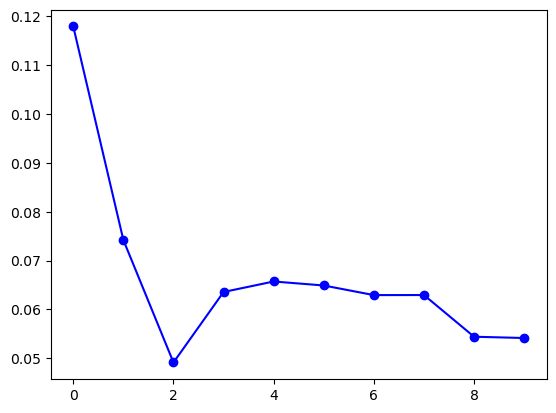

In [29]:
# explained variance by topics
plt.plot(lsa.explained_variance_ratio_,'bo-')

In [30]:
# Print the topics with their terms
terms = vectorizer_lsa.get_feature_names_out()

In [31]:
# Print the topics

def print_topics(lsa_model):
    for index, component in enumerate(lsa_model.components_):
        zipped = zip(terms, component)
        top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:5]
        top_terms_list=list(dict(top_terms_key).keys())
        print("Topic "+str(index)+": ",top_terms_list)
print_topics(lsa)

Topic 0:  ['agree', 'worst', 'def', '20', 'am']
Topic 1:  ['yeah', 'included', 'utilities', 'definitely', 'dislike']
Topic 2:  ['think', 'best', 'go', 'maintenance', 'availability']
Topic 3:  ['apartment', 'cell', 'phone', 'service', 'weak']
Topic 4:  ['rent', '20', 'big', 'increase', 'oof']
Topic 5:  ['well', 'like', 'also', 'available', 'clean']
Topic 6:  ['worst', 'def', 'well', 'like', 'also']
Topic 7:  ['included', 'utilities', 'bathrooms', 'includes', 'full']
Topic 8:  ['pick', 'building', 'friends', 'however', 'live']
Topic 9:  ['handled', 'not', 'promptly', 'says', 'worried']


### 4. Neural Embedding

In [32]:
# word vectors (word2vec)
import gensim.downloader as api
from scipy.spatial.distance import cosine

In [33]:
#loading the 100 dimension word vector dictionary trained on twitter data. https://nlp.stanford.edu/projects/glove/
model = api.load("glove-twitter-100")

In [35]:
# get the vector of the word cat
model.get_vector('dog')

array([ 5.0779e-01, -1.0274e+00,  4.8136e-01, -9.4170e-02,  4.4837e-01,
       -5.2291e-01,  5.1498e-01, -3.8927e-02,  3.5867e-01, -6.5994e-02,
       -8.2882e-01,  7.6179e-01, -3.8030e+00, -1.0576e-02,  2.1654e-01,
        5.9712e-01,  3.7424e-01, -2.2629e-02, -1.0331e-02, -3.3966e-01,
        9.4336e-02,  2.6253e-01, -4.0161e-01, -7.9532e-03,  1.0206e+00,
       -3.5793e-01, -5.6500e-01,  5.8815e-01, -8.1847e-01,  3.0293e-01,
        4.7199e-01, -9.7429e-02, -6.1226e-01, -1.7797e-01, -1.1616e-01,
        3.2586e-01,  1.1498e-01, -1.9030e-01,  1.1591e-02,  4.6478e-01,
       -1.6805e-01,  2.1972e-01, -2.5938e-01, -1.3541e-02,  7.0714e-01,
        7.8106e-01,  7.9917e-01,  1.0389e+00,  5.2792e-01, -1.1160e-01,
       -6.2275e-01,  3.0692e-02,  3.3847e-01, -5.3092e-01, -9.9688e-02,
        2.1596e-01,  6.0522e-01,  1.2356e+00, -3.4528e-03, -9.7514e-02,
       -2.4938e-01,  2.1539e-01,  4.4643e-01,  9.5375e-02, -2.7366e-01,
       -2.8537e-01, -4.0894e-01,  4.8223e-01,  3.0318e-01,  1.94

In [38]:
# get the most similar words as cat
model.most_similar('car')

[('truck', 0.8264449238777161),
 ('front', 0.7653979659080505),
 ('cars', 0.7632982730865479),
 ('driving', 0.7351886034011841),
 ('bus', 0.7341346740722656),
 ('drive', 0.7253391146659851),
 ('garage', 0.7020358443260193),
 ('cause', 0.7005500197410583),
 ('bike', 0.6979719996452332),
 ('on', 0.6933496594429016)]

In [41]:
# cosine similarity between cat and tiger
1-cosine(model.get_vector('cat'), model.get_vector('kitten'))

0.7936834692955017

In [ ]:
#cosine similarity between cat and kitten
1-cosine(model.get_vector('cat'), model.get_vector('kitten'))

In [ ]:
#cosine similarit between cat and car
1-cosine(model.get_vector('cat'), model.get_vector('car'))

### 5. Deep Learning Language Models
<https://huggingface.co/models?pipeline_tag=automatic-speech-recognition&sort=downloads>

In [42]:
# fill the blank task
from transformers import pipeline
unmasker = pipeline('fill-mask', model='xlm-roberta-base')

/Users/jhao/mambaforge/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
pd.DataFrame(unmasker("Hello I'm Jiangang, and I am running a <mask> to teach people machine learning."))

,score,token,token_str,sequence
0,0.213851,15411,course,"Hello I'm Jiangang, and I am running a course ..."
1,0.130649,18507,class,"Hello I'm Jiangang, and I am running a class t..."
2,0.127468,1528,program,"Hello I'm Jiangang, and I am running a program..."
3,0.093742,13452,project,"Hello I'm Jiangang, and I am running a project..."
4,0.068059,10696,school,"Hello I'm Jiangang, and I am running a school ..."


In [44]:
# another one, A: ordinary, B: stubborn, C: skeptical, D. fascinating, E. unobtrusive
pd.DataFrame(unmasker("It is ironic and somehow tragic that good people are often dull while evil people can be endlessly <mask>"))

,score,token,token_str,sequence
0,0.479797,5,.,It is ironic and somehow tragic that good peop...
1,0.098909,27,...,It is ironic and somehow tragic that good peop...
2,0.032577,4127,good,It is ironic and somehow tragic that good peop...
3,0.020705,17723,happy,It is ironic and somehow tragic that good peop...
4,0.016820,17110,sad,It is ironic and somehow tragic that good peop...


In [45]:
#sentence generation
from transformers import pipeline, set_seed
#generator = pipeline('text-generation', model='gpt2')
generator = pipeline('text-generation', model='EleutherAI/gpt-neo-1.3B')
set_seed(43)

In [46]:
prompt='Today, I am giving a traing workshop on machine learning and NLP. I am going to'
print(generator(prompt, max_length=120, num_return_sequences=1)[0].get('generated_text'))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Today, I am giving a traing workshop on machine learning and NLP. I am going to demonstrate various techniques on NLP, including named entity recognition, stemming, and phrase structure parsing.

You can use this to apply all kinds of NLP tasks on text datasets and see what you get back.

To enable others to benefit, I am sharing my knowledge freely and will ask for permission before sharing any code or data that I have. I encourage others to do the same.

My goal is to create a general-purpose deep learning framework for NLP tasks, and


### 6. Automated Scoring/Classification

In [47]:
# load the movie review sentiment data. Originally from: https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews
# 0 - negative
# 1 - somewhat negative
# 2 - neutral
# 3 - somewhat positive
# 4 - positive
ds = pd.read_csv('../data/movie_sentiment.tsv',sep='\t', low_memory=False)

In [48]:
ds.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [49]:
vectorizer = TfidfVectorizer(ngram_range=(1,2)) 
X = vectorizer.fit_transform(ds.Phrase.tolist())
y = ds.Sentiment.tolist()

In [50]:
# load machine learning model
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [51]:
# split the training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [52]:
# using linear SVM
model_SVM = LinearSVC()
tmp = model_SVM.fit(X_train,y_train)

In [53]:
# run ML to build automated classifier
y_pred_SVM = model_SVM.predict(X_test)

In [54]:
confusion_matrix = pd.crosstab(y_test, y_pred_SVM)

In [55]:
confusion_matrix

col_0,0,1,2,3,4
row_0,,,,,
0,1264,1668,554,45,5
1,1130,6270,5825,408,16
2,283,3405,31973,3652,207
3,23,380,6467,8197,1581
4,3,25,459,2361,1829


In [56]:
# get more classification report
import seaborn as sbn
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test,y_pred_SVM))

              precision    recall  f1-score   support

           0       0.47      0.36      0.41      3536
           1       0.53      0.46      0.49     13649
           2       0.71      0.81      0.75     39520
           3       0.56      0.49      0.52     16648
           4       0.50      0.39      0.44      4677

    accuracy                           0.63     78030
   macro avg       0.55      0.50      0.52     78030
weighted avg       0.62      0.63      0.62     78030



<AxesSubplot: xlabel='col_0', ylabel='row_0'>

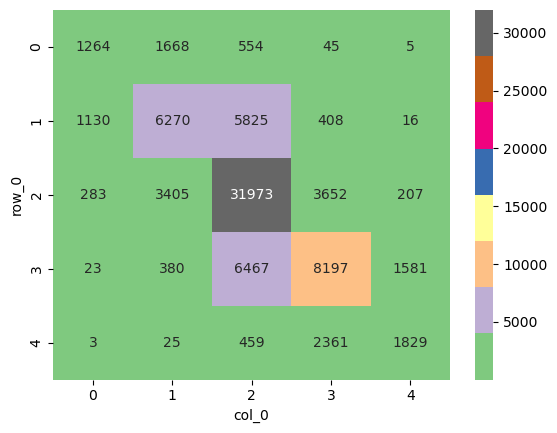

In [58]:
sbn.heatmap(confusion_matrix,annot=True,fmt='.0f',cmap="Accent")